Objective is to determine whether the plant has disease or not

Extracting the dataset from a zip file

In [3]:
from zipfile import ZipFile
dataset='archive.zip'

zip=ZipFile(dataset,'r')
zip.extractall()

 Step 1: Importing the required libraries

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random 
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [12]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[0:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[0:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[0:5])


['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


Number of classes=38

Step 2 : Data Preprocessing

(256, 256, 3)


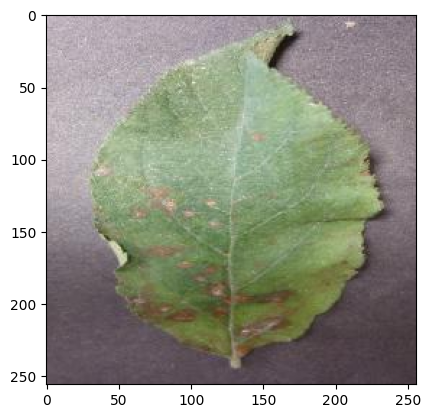

In [13]:
#dataset path
base_dir="plantvillage dataset/color"

image_path="plantvillage dataset/color/Apple___Cedar_apple_rust/1a80b84d-1a5a-4e23-8deb-823ba928e29a___FREC_C.Rust 4431.JPG"

#reading the image
img = mpimg.imread(image_path)

print(img.shape)

#displaying the image
plt.imshow(img)
plt.show()

In [14]:
print(img)

[[[182 170 180]
  [187 175 185]
  [183 171 181]
  ...
  [115 102 112]
  [124 111 121]
  [134 121 131]]

 [[197 185 195]
  [202 190 200]
  [195 183 193]
  ...
  [132 119 129]
  [124 111 121]
  [129 116 126]]

 [[201 189 199]
  [206 194 204]
  [196 184 194]
  ...
  [134 121 131]
  [117 104 114]
  [121 108 118]]

 ...

 [[ 95  82  91]
  [ 94  81  90]
  [ 94  81  90]
  ...
  [ 71  58  65]
  [ 72  59  66]
  [ 73  60  67]]

 [[ 96  83  92]
  [ 95  82  91]
  [ 95  82  91]
  ...
  [ 72  59  66]
  [ 72  59  66]
  [ 72  59  66]]

 [[ 99  86  95]
  [ 98  85  94]
  [ 98  85  94]
  ...
  [ 71  58  65]
  [ 69  56  63]
  [ 68  55  62]]]


In [15]:
#iamge parameters
img_size=224
batch_size=32

Step 3 : Train Test Split

In [16]:
#Image data generator
data_gen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
)

#training Generator
train_generator= data_gen.flow_from_directory(
        base_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        subset = 'training',
        class_mode = 'categorical'
)


#Validation generator
validation_generator = data_gen.flow_from_directory(
        base_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        subset = 'validation',
        class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


Step 4 : Building the CNN

In [17]:
model=keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3,3) , activation='relu', input_shape=(img_size,img_size,3)), #convolutional layer
        keras.layers.MaxPooling2D(pool_size=(2,2)), #maxpooling layer
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu') ,
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(38, activation='softmax')
])

#compiling the model
model.compile(optimizer='adam',
               loss= 'categorical_crossentropy',
               metrics=['accuracy']
        )


#training the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//batch_size,  #no. of steps per epoch
        epochs=5,
        validation_data=validation_generator,
        validation_steps = validation_generator.samples//batch_size #validation steps
)


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1183s 870ms/step - accuracy: 0.6046 - loss: 1.6160 - val_accuracy: 0.8697 - val_loss: 0.4181
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 681s 501ms/step - accuracy: 0.9240 - loss: 0.2428 - val_accuracy: 0.8522 - val_loss: 0.4776
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 701s 516ms/step - accuracy: 0.9675 - loss: 0.0998 - val_accuracy: 0.8874 - val_loss: 0.4139
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 705s 519ms/step - accuracy: 0.9780 - loss: 0.0682 - val_accuracy: 0.8749 - val_loss: 0.5150
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 693s 510ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.8619 - val_loss: 0.5705


In [18]:
#model evalutaion

print("Evaluating model....")
val_loss, val_accuracy=model.evaluate(validation_generator, steps= validation_generator.samples//batch_size)
print("Validation Accuracy : ",val_accuracy* 100 ,"%")

Evaluating model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.8590 - loss: 0.5825
Validation Accuracy :  86.20021939277649 %


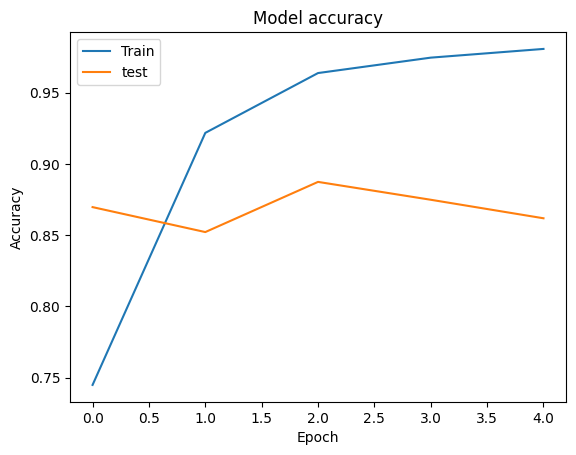

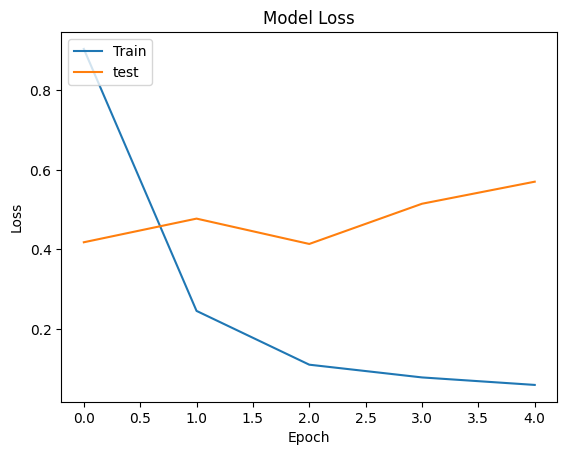

In [19]:
#ploting training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','test'],loc='upper left')
plt.show()


#ploting training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','test'],loc='upper left')
plt.show()


Step 5 : Predictive system

In [20]:
def load_and_preprocess_image(image_path, target_size=(224,224)):
        img=Image.open(image_path)

        img=img.resize(target_size)

        img_array=np.array(img)

        #add batch dimensions
        img_array=np.expand_dims(img_array, axis=0)
        img_array=img_array.astype('float32')/255.0

        return img_array


def predict_image_class(model, image_path, class_indices):
        preprocessed_img=load_and_preprocess_image(image_path)
        prediction=model.predict(preprocessed_img)
        predicted_class_index=np.argmax(prediction)
        predicted_class_name= class_indices[predicted_class_index]
         
        return predicted_class_name

class_indices={v: k for k, v in train_generator.class_indices.items()}



image_path='plantvillage dataset/color/Apple___Apple_scab/0a6812de-7416-4ffe-aba9-307599a02c84___FREC_Scab 2973.JPG'
print(predict_image_class(model,image_path,class_indices))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Apple___Apple_scab


In [21]:
model.save('plant_disease_prediction_model.h5')